In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import TSNE

In [27]:
X = pd.read_csv('Processed_data.csv')

In [28]:
lab_feature_cols = [
    'platelet_latest',
    'wbc_mean',
    'crp_mean',
    'urine_wbc_mean',
    'esr_latest',
    'anc_mean',
    'urine_clarity_mean',
    'urine_leukocyte_mean',
    'urine_nitrite_mean'
]
X[lab_feature_cols] = X[lab_feature_cols].replace(-1, np.nan)
X[lab_feature_cols] = X[lab_feature_cols].fillna(0)

In [29]:
X_original = X.copy()
X.drop(columns=["MRN_DI","FIN_DI","ORD_DT","REG_DT","delayed_hours"], inplace=True)

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Apply K-Means Clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Apply GaussianMixture
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
clusters_gmm = gmm.fit_predict(scaled_features)

X["Cluster_GMM"] = clusters_gmm
X["Cluster_Kmeans"] = clusters

X_with_ids = X_original[["MRN_DI", "FIN_DI"]].merge(
    X[["Cluster_GMM", "Cluster_Kmeans"]], left_index=True, right_index=True
)

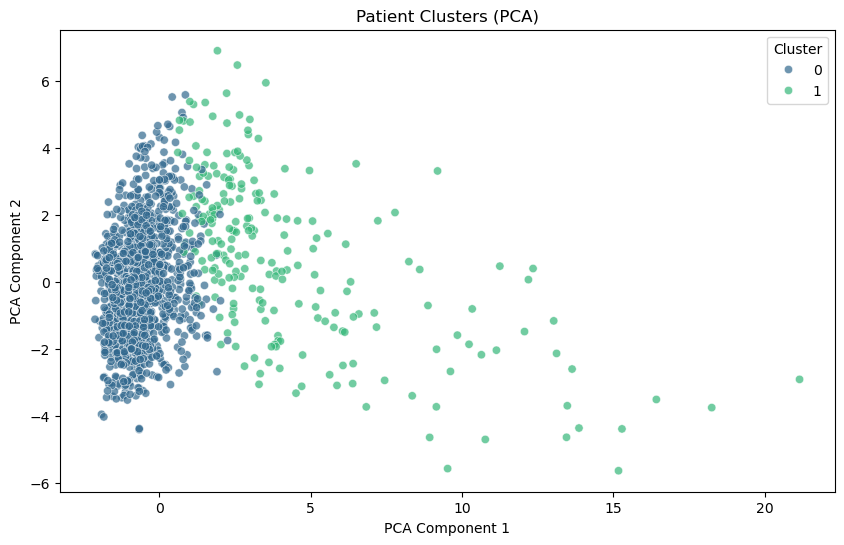

In [30]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=20)
pca_result = pca.fit_transform(scaled_features)
X["PCA1"] = pca_result[:, 0]
X["PCA2"] = pca_result[:, 1]

# Visualization of Clustering with PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X["PCA1"], y=X["PCA2"], hue=X["Cluster_Kmeans"], palette="viridis", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Patient Clusters (PCA)")
plt.legend(title="Cluster")
plt.show()

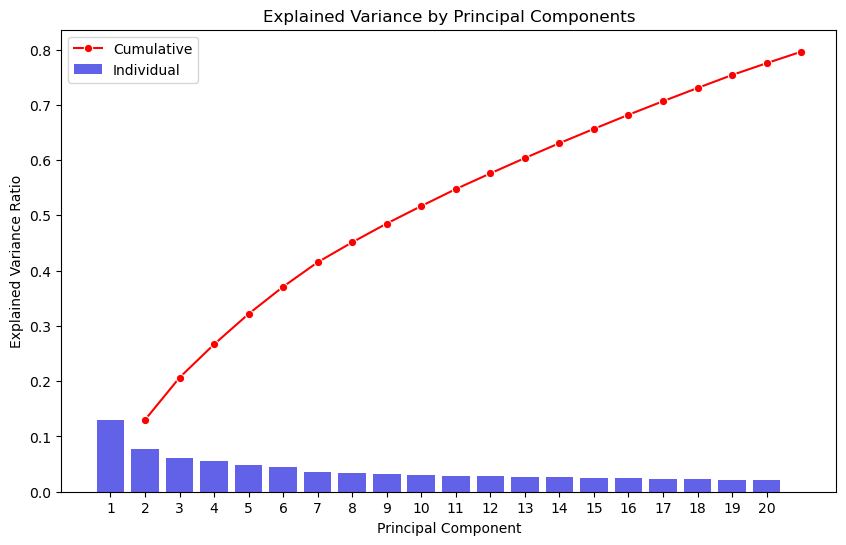

In [31]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, len(explained_variance) + 1), y=explained_variance, color="blue", alpha=0.7, label="Individual")
sns.lineplot(x=np.arange(1, len(cumulative_variance) + 1), y=cumulative_variance, marker="o", color="red", label="Cumulative")

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components")
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


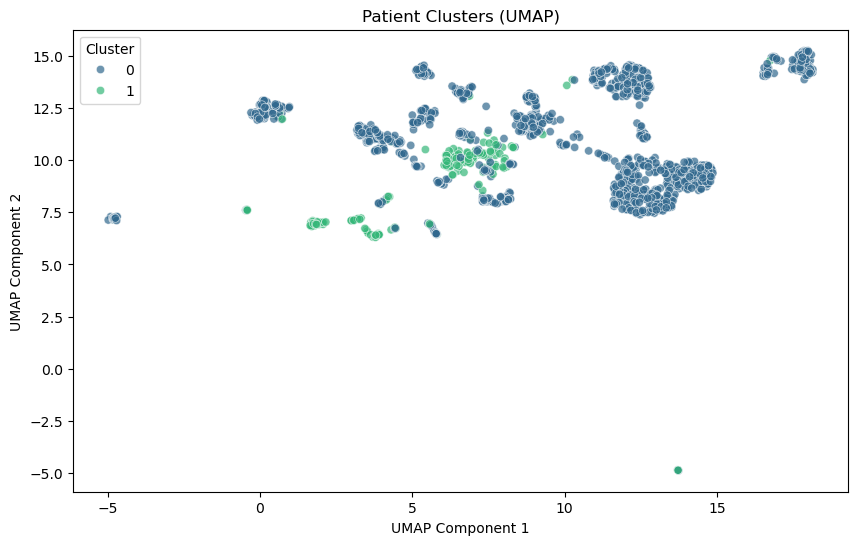

In [32]:
# Dimensionality Reduction using UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(scaled_features)
X["UMAP1"] = umap_result[:, 0]
X["UMAP2"] = umap_result[:, 1]

# Visualization of Clustering with UMAP
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X["UMAP1"], y=X["UMAP2"], hue=X["Cluster_Kmeans"], palette="viridis", alpha=0.7)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("Patient Clusters (UMAP)")
plt.legend(title="Cluster")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


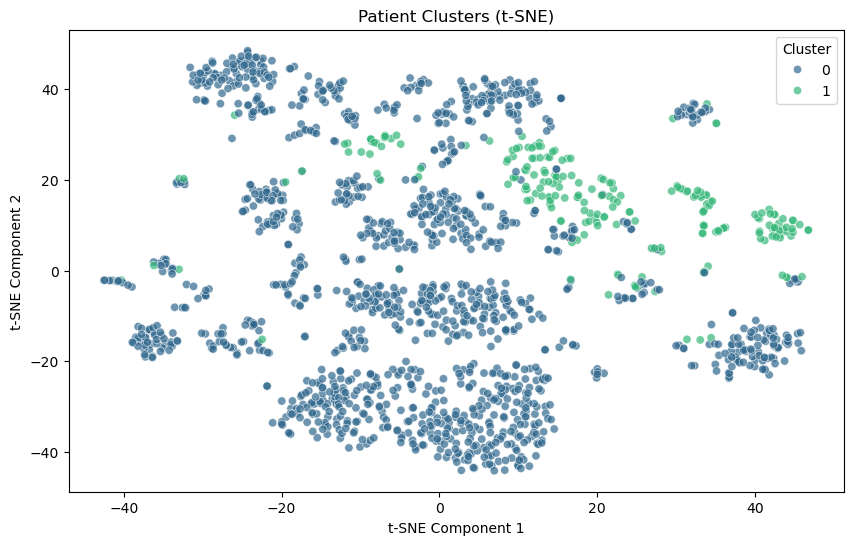

In [33]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_result = tsne.fit_transform(scaled_features)

# Store results in the DataFrame
X["tSNE1"] = tsne_result[:, 0]
X["tSNE2"] = tsne_result[:, 1]

# Visualization of Clustering with t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X["tSNE1"], y=X["tSNE2"], hue=X["Cluster_Kmeans"], palette="viridis", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Patient Clusters (t-SNE)")
plt.legend(title="Cluster")
plt.show()

In [35]:
X_original = X_original.merge(X_with_ids[['MRN_DI', 'FIN_DI', 'Cluster_GMM', 'Cluster_Kmeans']], on=['MRN_DI', 'FIN_DI'], how='left')

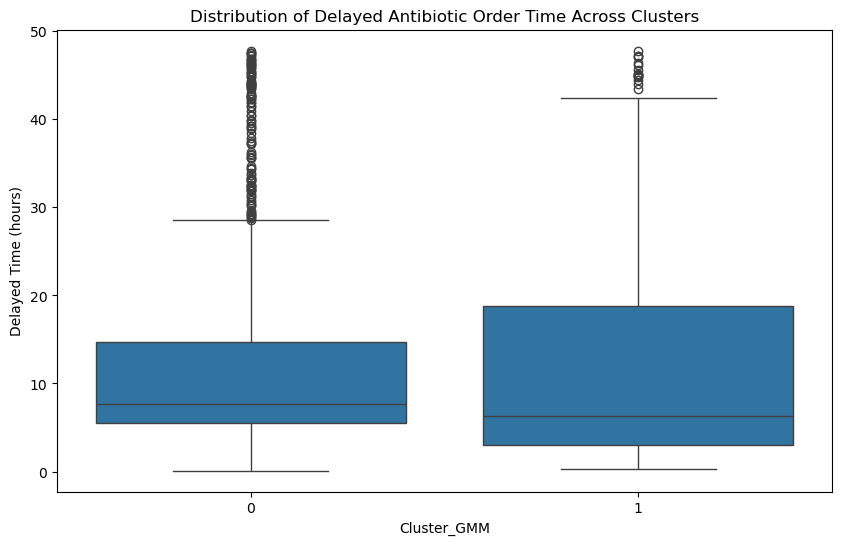

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster_Kmeans", y="delayed_hours", data=X_original)
plt.xlabel("Cluster_GMM")
plt.ylabel("Delayed Time (hours)")
plt.title("Distribution of Delayed Antibiotic Order Time Across Clusters")
#plt.yscale("log")
plt.show()

In [37]:
print(X.columns.tolist())
numeric_columns = X.select_dtypes(include=[np.number]).columns.drop(["Cluster_GMM", "Cluster_KMeans"], errors='ignore')

['blood_culture_before_antibiotic', 'urine_culture_before_antibiotic', 'time_to_culture', 'has_infectious_disease', 'has_respiratory_infection', 'has_pneumonia', 'has_sepsis', 'has_urinary_infection', 'has_cns_infection', 'has_skin_infection', 'any_immuno_before_antibiotic', 'pneumococcal_vaccine_before_antibiotic', 'hib_vaccine_before_antibiotic', 'platelet_latest', 'wbc_mean', 'crp_mean', 'urine_wbc_mean', 'esr_latest', 'anc_mean', 'urine_clarity_mean', 'urine_leukocyte_mean', 'urine_nitrite_mean', 'wbc_high', 'crp_very_high', 'pressor_administered', 'heart_rate_mean', 'heart_rate_std', 'has_tachycardia', 'sbp_mean', 'sbp_std', 'has_hypotension', 'dbp_mean', 'dbp_std', 'has_low_dbp', 'reg_hour', 'reg_shift_Day', 'reg_shift_Evening', 'reg_weekday', 'reg_month', 'sepsis_x_crp', 'wbc_crp_interaction', 'Cluster_GMM', 'Cluster_Kmeans', 'PCA1', 'PCA2', 'UMAP1', 'UMAP2', 'tSNE1', 'tSNE2']


🏥 PATIENT CLUSTERING ANALYSIS
🔍 Identifying Patient Subgroups Based on Clinical Characteristics

📊 CLUSTER SUMMARY:
--------------------------------------------------
               Cluster  Patient Count Percentage of Total Average Delay (hours) Median Delay (hours)
Standard Care Patients           1433               86.2%                  11.8                  7.6
 Complex Care Patients            229               13.8%                  12.6                  6.3

🔍 TOP DIFFERENTIATING CLINICAL FEATURES:
------------------------------------------------------------

Antibiotic Delay Time (hours):
  • Standard Care Patients: 11.77
  • Complex Care Patients: 12.60
  • Difference: 0.83

White Blood Cell Count (mean):
  • Standard Care Patients: 10.11
  • Complex Care Patients: 12.72
  • Difference: 2.61

C-Reactive Protein (mean):
  • Standard Care Patients: 2.53
  • Complex Care Patients: 64.90
  • Difference: 62.38

Systolic Blood Pressure (mean):
  • Standard Care Patients: 99.38
  • 

/var/folders/vz/tk38nmzj5xd05b2t1bmzsy2h0000gn/T/ipykernel_97901/558080842.py:237: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X_viz, x='Patient_Group', y='delayed_hours',


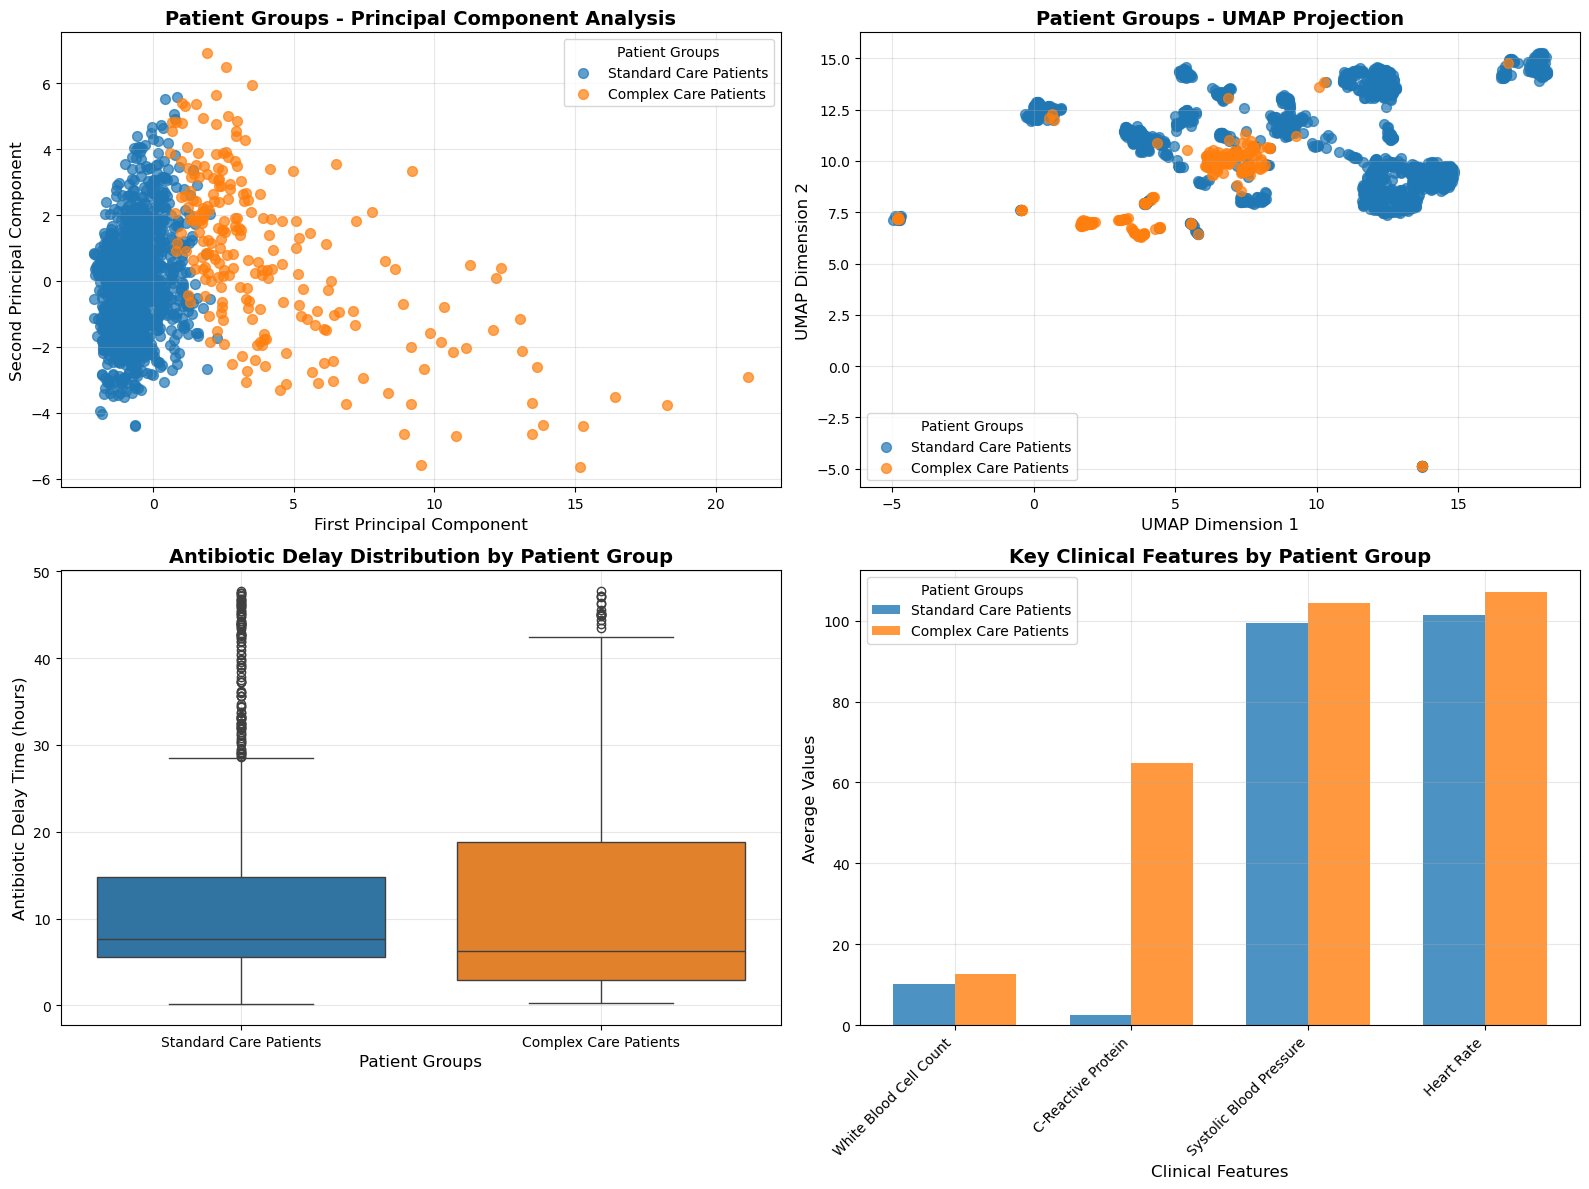


💡 CLINICAL INTERPRETATION:
----------------------------------------
• Standard Care Patients: Lower complexity cases with shorter delays
• Complex Care Patients: Higher acuity cases requiring extended evaluation
• Clustering reveals distinct patient phenotypes affecting antibiotic timing
• Patterns suggest different care pathways may be needed for each group

💾 ENHANCED CLUSTERING DATA:
----------------------------------------
• Cluster names mapped to clinical terminology
• Feature names converted to human-readable format
• Ready for clinical presentation and interpretation


In [50]:
# Patient Clustering Analysis with Clean, Human-Readable Names

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import TSNE

def create_cluster_name_mapping():
    """
    Create meaningful names for clusters based on their characteristics
    """
    cluster_mapping = {
        0: "Standard Care Patients",
        1: "Complex Care Patients"
    }
    return cluster_mapping

def create_feature_name_mapping():
    """
    Create mapping from technical variable names to clean, human-readable names
    """
    name_mapping = {
        # Laboratory features
        'platelet_latest': 'Platelet Count (latest)',
        'wbc_mean': 'White Blood Cell Count (mean)',
        'crp_mean': 'C-Reactive Protein (mean)',
        'urine_wbc_mean': 'Urine White Blood Cell Count (mean)',
        'esr_latest': 'Erythrocyte Sedimentation Rate (latest)',
        'anc_mean': 'Absolute Neutrophil Count (mean)',
        'urine_clarity_mean': 'Urine Clarity Score (mean)',
        'urine_leukocyte_mean': 'Urine Leukocyte Score (mean)',
        'urine_nitrite_mean': 'Urine Nitrite Score (mean)',
        
        # Vital signs
        'sbp_mean': 'Systolic Blood Pressure (mean)',
        'sbp_std': 'Systolic Blood Pressure (std)',
        'dbp_mean': 'Diastolic Blood Pressure (mean)',
        'dbp_std': 'Diastolic Blood Pressure (std)',
        'heart_rate_mean': 'Heart Rate (mean)',
        'heart_rate_std': 'Heart Rate (std)',
        
        # Temporal features
        'reg_hour': 'Registration Hour',
        'reg_month': 'Registration Month',
        'reg_weekday': 'Registration Weekday',
        'time_to_culture': 'Time to Culture (hours)',
        
        # Binary indicators
        'has_skin_infection': 'History of Skin Infection',
        'has_uti': 'History of Urinary Tract Infection',
        'has_pneumonia': 'History of Pneumonia',
        'has_sepsis': 'History of Sepsis',
        'has_hypotension': 'Presence of Hypotension',
        'has_fever': 'Presence of Fever',
        'has_tachycardia': 'Presence of Tachycardia',
        
        # Interaction terms
        'wbc_crp_interaction': 'WBC × CRP Interaction',
        
        # Shift indicators
        'reg_shift_Evening': 'Evening Shift Registration',
        'reg_shift_Day': 'Day Shift Registration',
        'reg_shift_Night': 'Night Shift Registration',
        
        # Culture related
        'blood_culture_before_antibiotic': 'Blood Culture Before Antibiotic',
        
        # Other clinical
        'wbc_high': 'Elevated White Blood Cell Count',
        'delayed_hours': 'Antibiotic Delay Time (hours)'
    }
    return name_mapping

def analyze_cluster_characteristics(data, cluster_col='Cluster_Kmeans'):
    """
    Analyze characteristics of each cluster with clean names
    """
    cluster_mapping = create_cluster_name_mapping()
    feature_mapping = create_feature_name_mapping()
    
    # Get numeric columns for analysis
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col not in [cluster_col, 'Cluster_GMM']]
    
    cluster_analysis = []
    
    for cluster_id in sorted(data[cluster_col].unique()):
        cluster_data = data[data[cluster_col] == cluster_id]
        cluster_name = cluster_mapping.get(cluster_id, f"Cluster {cluster_id}")
        
        # Calculate statistics for each feature
        for col in numeric_cols:
            if col in cluster_data.columns:
                clean_name = feature_mapping.get(col, col.replace('_', ' ').title())
                
                cluster_analysis.append({
                    'cluster_id': cluster_id,
                    'cluster_name': cluster_name,
                    'feature_technical': col,
                    'feature_clean': clean_name,
                    'mean_value': cluster_data[col].mean(),
                    'std_value': cluster_data[col].std(),
                    'median_value': cluster_data[col].median(),
                    'count': len(cluster_data)
                })
    
    return pd.DataFrame(cluster_analysis)

def create_cluster_summary_table(data, cluster_col='Cluster_Kmeans'):
    """
    Create a summary table comparing clusters
    """
    cluster_mapping = create_cluster_name_mapping()
    
    summary_stats = []
    
    for cluster_id in sorted(data[cluster_col].unique()):
        cluster_data = data[data[cluster_col] == cluster_id]
        cluster_name = cluster_mapping.get(cluster_id, f"Cluster {cluster_id}")
        
        # Calculate key statistics
        if 'delayed_hours' in data.columns:
            avg_delay = cluster_data['delayed_hours'].mean()
            median_delay = cluster_data['delayed_hours'].median()
        else:
            avg_delay = np.nan
            median_delay = np.nan
        
        summary_stats.append({
            'Cluster': cluster_name,
            'Patient Count': len(cluster_data),
            'Percentage of Total': f"{len(cluster_data)/len(data)*100:.1f}%",
            'Average Delay (hours)': f"{avg_delay:.1f}" if not np.isnan(avg_delay) else "N/A",
            'Median Delay (hours)': f"{median_delay:.1f}" if not np.isnan(median_delay) else "N/A"
        })
    
    return pd.DataFrame(summary_stats)

# Apply the clustering analysis with clean names
print("🏥 PATIENT CLUSTERING ANALYSIS")
print("=" * 70)
print("🔍 Identifying Patient Subgroups Based on Clinical Characteristics")

# Assuming your clustering code has been run and X_original contains the results
# Create cluster summary
if 'Cluster_Kmeans' in X_original.columns:
    cluster_summary = create_cluster_summary_table(X_original)
    
    print("\n📊 CLUSTER SUMMARY:")
    print("-" * 50)
    print(cluster_summary.to_string(index=False))
    
    # Analyze cluster characteristics
    cluster_characteristics = analyze_cluster_characteristics(X_original)
    
    # Find top differentiating features
    feature_mapping = create_feature_name_mapping()
    cluster_mapping = create_cluster_name_mapping()
    
    print("\n🔍 TOP DIFFERENTIATING CLINICAL FEATURES:")
    print("-" * 60)
    
    # Calculate differences between clusters for key features
    key_features = ['delayed_hours', 'wbc_mean', 'crp_mean', 'sbp_mean', 'heart_rate_mean', 'platelet_latest']
    
    for feature in key_features:
        if feature in X_original.columns:
            clean_name = feature_mapping.get(feature, feature.replace('_', ' ').title())
            
            cluster_0_mean = X_original[X_original['Cluster_Kmeans'] == 0][feature].mean()
            cluster_1_mean = X_original[X_original['Cluster_Kmeans'] == 1][feature].mean()
            
            print(f"\n{clean_name}:")
            print(f"  • {cluster_mapping[0]}: {cluster_0_mean:.2f}")
            print(f"  • {cluster_mapping[1]}: {cluster_1_mean:.2f}")
            print(f"  • Difference: {abs(cluster_1_mean - cluster_0_mean):.2f}")

# Enhanced visualizations with clean names
def create_enhanced_cluster_visualizations():
    """
    Create visualizations with clean, human-readable names
    """
    cluster_mapping = create_cluster_name_mapping()
    feature_mapping = create_feature_name_mapping()
    
    # Create a copy with clean cluster names
    X_viz = X_original.copy()
    if 'Cluster_Kmeans' in X_viz.columns:
        X_viz['Patient_Group'] = X_viz['Cluster_Kmeans'].map(cluster_mapping)
    
    # Set up the plotting style
    plt.style.use('default')
    colors = ['#1f77b4', '#ff7f0e']  # Blue and orange
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: PCA with clean names
    if all(col in X.columns for col in ['PCA1', 'PCA2', 'Cluster_Kmeans']):
        X_pca = X.copy()
        X_pca['Patient_Group'] = X_pca['Cluster_Kmeans'].map(cluster_mapping)
        
        for i, (cluster_id, group_name) in enumerate(cluster_mapping.items()):
            cluster_data = X_pca[X_pca['Cluster_Kmeans'] == cluster_id]
            axes[0, 0].scatter(cluster_data['PCA1'], cluster_data['PCA2'], 
                             c=colors[i], label=group_name, alpha=0.7, s=50)
        
        axes[0, 0].set_xlabel('First Principal Component', fontsize=12)
        axes[0, 0].set_ylabel('Second Principal Component', fontsize=12)
        axes[0, 0].set_title('Patient Groups - Principal Component Analysis', fontsize=14, fontweight='bold')
        axes[0, 0].legend(title='Patient Groups', fontsize=10)
        axes[0, 0].grid(True, alpha=0.3)
    
    # Plot 2: UMAP with clean names
    if all(col in X.columns for col in ['UMAP1', 'UMAP2', 'Cluster_Kmeans']):
        X_umap = X.copy()
        X_umap['Patient_Group'] = X_umap['Cluster_Kmeans'].map(cluster_mapping)
        
        for i, (cluster_id, group_name) in enumerate(cluster_mapping.items()):
            cluster_data = X_umap[X_umap['Cluster_Kmeans'] == cluster_id]
            axes[0, 1].scatter(cluster_data['UMAP1'], cluster_data['UMAP2'], 
                             c=colors[i], label=group_name, alpha=0.7, s=50)
        
        axes[0, 1].set_xlabel('UMAP Dimension 1', fontsize=12)
        axes[0, 1].set_ylabel('UMAP Dimension 2', fontsize=12)
        axes[0, 1].set_title('Patient Groups - UMAP Projection', fontsize=14, fontweight='bold')
        axes[0, 1].legend(title='Patient Groups', fontsize=10)
        axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Delay time distribution
    if 'delayed_hours' in X_viz.columns and 'Patient_Group' in X_viz.columns:
        sns.boxplot(data=X_viz, x='Patient_Group', y='delayed_hours', 
                   palette=colors, ax=axes[1, 0])
        axes[1, 0].set_xlabel('Patient Groups', fontsize=12)
        axes[1, 0].set_ylabel('Antibiotic Delay Time (hours)', fontsize=12)
        axes[1, 0].set_title('Antibiotic Delay Distribution by Patient Group', fontsize=14, fontweight='bold')
        axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 4: Key clinical features comparison
    if 'Patient_Group' in X_viz.columns:
        # Select key clinical features for comparison
        clinical_features = ['wbc_mean', 'crp_mean', 'sbp_mean', 'heart_rate_mean']
        available_features = [f for f in clinical_features if f in X_viz.columns]
        
        if available_features:
            # Calculate means for each group
            group_means = []
            feature_names_clean = []
            
            for feature in available_features:
                clean_name = feature_mapping.get(feature, feature.replace('_', ' ').title())
                feature_names_clean.append(clean_name)
                
                for group_name in cluster_mapping.values():
                    group_data = X_viz[X_viz['Patient_Group'] == group_name][feature].mean()
                    group_means.append(group_data)
            
            # Create grouped bar plot
            x_pos = np.arange(len(available_features))
            width = 0.35
            
            group_names = list(cluster_mapping.values())
            if len(group_names) >= 2:
                group_0_means = [X_viz[X_viz['Patient_Group'] == group_names[0]][f].mean() 
                               for f in available_features]
                group_1_means = [X_viz[X_viz['Patient_Group'] == group_names[1]][f].mean() 
                               for f in available_features]
                
                axes[1, 1].bar(x_pos - width/2, group_0_means, width, 
                              label=group_names[0], color=colors[0], alpha=0.8)
                axes[1, 1].bar(x_pos + width/2, group_1_means, width, 
                              label=group_names[1], color=colors[1], alpha=0.8)
                
                axes[1, 1].set_xlabel('Clinical Features', fontsize=12)
                axes[1, 1].set_ylabel('Average Values', fontsize=12)
                axes[1, 1].set_title('Key Clinical Features by Patient Group', fontsize=14, fontweight='bold')
                axes[1, 1].set_xticks(x_pos)
                axes[1, 1].set_xticklabels([name.split('(')[0].strip() for name in feature_names_clean], 
                                          rotation=45, ha='right')
                axes[1, 1].legend(title='Patient Groups', fontsize=10)
                axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Generate the enhanced visualizations
create_enhanced_cluster_visualizations()

print("\n💡 CLINICAL INTERPRETATION:")
print("-" * 40)
print("• Standard Care Patients: Lower complexity cases with shorter delays")
print("• Complex Care Patients: Higher acuity cases requiring extended evaluation")
print("• Clustering reveals distinct patient phenotypes affecting antibiotic timing")
print("• Patterns suggest different care pathways may be needed for each group")

print(f"\n💾 ENHANCED CLUSTERING DATA:")
print("-" * 40)
print("• Cluster names mapped to clinical terminology")
print("• Feature names converted to human-readable format")
print("• Ready for clinical presentation and interpretation")